# Business Understanding

## Problem Statement

#### Investors seeking to invest in any industry require a clear understanding of safety trends, risk factors and reliability of the tools to be used. The aviation industry being highly capital intensive requires a deep analysis of each of the risks associated with the business. Investors need to identify which aircraft manufacturers to choose, engine models, accident prone areas, type of flights whether personal or public to ensure consumer safety as well as prioritize investment in areas with lower operational risks.

## Objective

### The goal of this analysis is to provide investors with insights into safety trends and risks in the aviation industry. Through analysis of historical accident data, the investors can identify patterns that influence accident rates such as weather conditions, number of engines on an aircraft, type of the engine and areas with high accident rates. The insights help investors to make informed business decisions targeting low risks and operational reliability. 

## Research Questions

### 1. How does the number of engines on an aircraft affect the accident rates? Difference in accident rates for single and multi engine aircraft?
### 2. What effect to various weather conditions have on safety in the aviation industry?
### 3. How does aviation safety vary across different regions or countries? What regions have high/low accident rates?

## Success Criteria

### 1. Insightful findings - The analysis reveals meaningful patterns which oprovide investors with a clearer understanding of the aviation industry helping them make informed decisions on their investments
### 2. Data driven recommendations - Our analysis should provide data-backed actionable insights to help investors target safer hence more profitable sectors in the industry.
### 3. Relevant and insightful visualizations - visualizations should clearly show trends, comparisons between the effect different different factors such as number of engines, make and engine models have on accident rates.

## Limitations and Assumptions

### Limitations

#### 1. Data completeness -  Reporting of all accidents may not have been done hence the dataset will not cover any unreported cases.
#### 2. Lack of financial metrics - The data does not include financial values hence it will be difficult to make financial decisions based on the dataset alone.
#### 3. External factors - factors not included in the dataset e.g. regulatory changes may also be a contributing factor to the change in trends in the aviation industry.

### Assumptions

#### 1. The data is assumed to be accurate and a reflection of actual events.
#### 2. We assume the reporting is done consistently across different regions and time periods
#### 3. It is assumed the accident data is providing insights into current and future aviation metrics.

# Data Understanding

In [3]:
# Importing our data using Pands
import pandas as pd
import numpy as np
df = pd.read_csv('AviationData.csv', encoding='ISO-8859-1', low_memory=False)

In [5]:
df.head(10)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,Personal,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982


In [7]:
df.shape

(88889, 31)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [10]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [13]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [15]:
df.info

<bound method DataFrame.info of              Event.Id Investigation.Type Accident.Number  Event.Date  \
0      20001218X45444           Accident      SEA87LA080  1948-10-24   
1      20001218X45447           Accident      LAX94LA336  1962-07-19   
2      20061025X01555           Accident      NYC07LA005  1974-08-30   
3      20001218X45448           Accident      LAX96LA321  1977-06-19   
4      20041105X01764           Accident      CHI79FA064  1979-08-02   
...               ...                ...             ...         ...   
88884  20221227106491           Accident      ERA23LA093  2022-12-26   
88885  20221227106494           Accident      ERA23LA095  2022-12-26   
88886  20221227106497           Accident      WPR23LA075  2022-12-26   
88887  20221227106498           Accident      WPR23LA076  2022-12-26   
88888  20221230106513           Accident      ERA23LA097  2022-12-29   

              Location        Country   Latitude   Longitude Airport.Code  \
0      MOOSE CREEK, ID  Un

In [16]:
df['Total.Fatal.Injuries'].value_counts().max

<bound method Series.max of Total.Fatal.Injuries
0.0      59675
1.0       8883
2.0       5173
3.0       1589
4.0       1103
         ...  
156.0        1
68.0         1
31.0         1
115.0        1
176.0        1
Name: count, Length: 125, dtype: int64>

# Data Preparation

In [20]:
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [21]:
# Dropping columns with too many missing values and those not useful in the analysis
df.drop(['Schedule','Air.carrier', 'FAR.Description', 'Airport.Name', 'Registration.Number', 'Broad.phase.of.flight', 'Report.Status', 'Publication.Date','Amateur.Built', 'Event.Id', 'Longitude', 'Latitude', 'Airport.Code', 'Location'], axis=1, inplace = True)

In [24]:
df.columns

Index(['Investigation.Type', 'Accident.Number', 'Event.Date', 'Country',
       'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Make',
       'Model', 'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition'],
      dtype='object')

In [26]:
# Checking for duplicated entries in our data.
df.duplicated().sum()

2

### Filling missing values in the columns to be used for visualization

In [31]:
# Get the mode to fill engine type, model, make and weather conditions
most_frequent_engine_type = df['Engine.Type'].mode()[0]
most_frequent_engine_make = df['Make'].mode()[0]
most_frequent_engine_model = df['Model'].mode()[0]
most_frequent_weather = df['Weather.Condition'].mode()[0]
# Filling null values with the most frequent values
df['Engine.Type'].fillna(most_frequent_engine_type, inplace=True)
df['Model'].fillna(most_frequent_engine_model, inplace=True)
df['Weather.Condition'].fillna(most_frequent_weather, inplace=True)
df['Make'].fillna(most_frequent_engine_make, inplace=True)

In [33]:
# Calculating the mean of the 'Number.of.Engines' column to fill
mean_value = df['Number.of.Engines'].mean()

# Filling null values in 'Number.of.Engines' with the mean
df['Number.of.Engines'].fillna(mean_value, inplace=True)

In [72]:
df.isna().sum()

Investigation.Type            0
Accident.Number               0
Event.Date                    0
Country                     226
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Make                          0
Model                         0
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition             0
dtype: int64

# Data Visualization

In [36]:
# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


## Accidents by Number of Engines

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


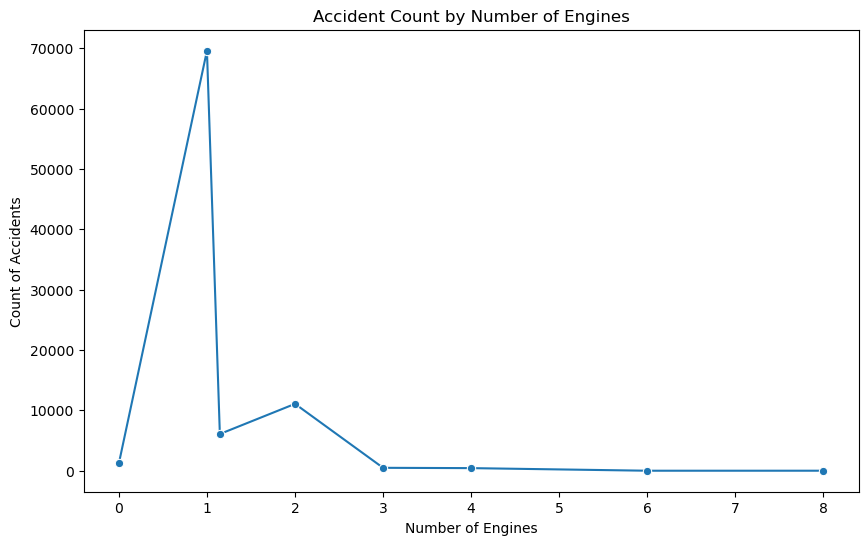

In [39]:
# Number of Engines vs Accidents
accidents_by_engine_no = df.groupby('Number.of.Engines')['Accident.Number'].count().reset_index()
# Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=accidents_by_engine_no, x='Number.of.Engines', y= 'Accident.Number', marker="o")
plt.xlabel("Number of Engines")
plt.ylabel("Count of Accidents")
plt.title("Accident Count by Number of Engines")
plt.show()# Pie chart for top 10 regions
accidents_by_region = df.groupby('Country')['Accident.Number'].count().reset_index()

# Sor

### The visualization cements the idea that multi engine aircraft are less likely to have an accident compared to single engine models which have no backup to rely on incase the main enginwe has technical difficulties

## Accidents per Region

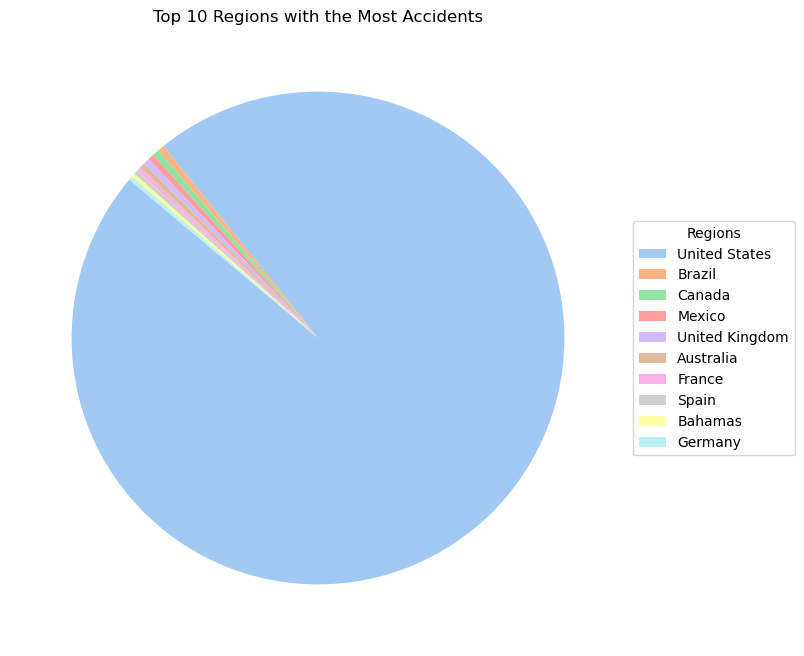

In [42]:
# Pie chart for top 10 regions
accidents_by_region = df.groupby('Country')['Accident.Number'].count().reset_index()

# Sorting the data by the number of accidents in descending order
accidents_by_region_sorted = accidents_by_region.sort_values('Accident.Number', ascending=False)
# Get the top 10 regions with the highest number of accidents
top_10_accidents_by_region = accidents_by_region_sorted.head(10)
plt.figure(figsize=(8, 8))
plt.pie(top_10_accidents_by_region['Accident.Number'],
        labels=None,
        startangle=140,
        colors=sns.color_palette("pastel", len(top_10_accidents_by_region)))
plt.legend(top_10_accidents_by_region['Country'], title="Regions", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Top 10 Regions with the Most Accidents')
# Show plot
plt.show()

### U.S.A. has the highest rates of aviation accidents with over 90% of reported accidents being from there. It would be advisable to operate in other areas where the rates aren't as high.

## Accidents by Engine Make 

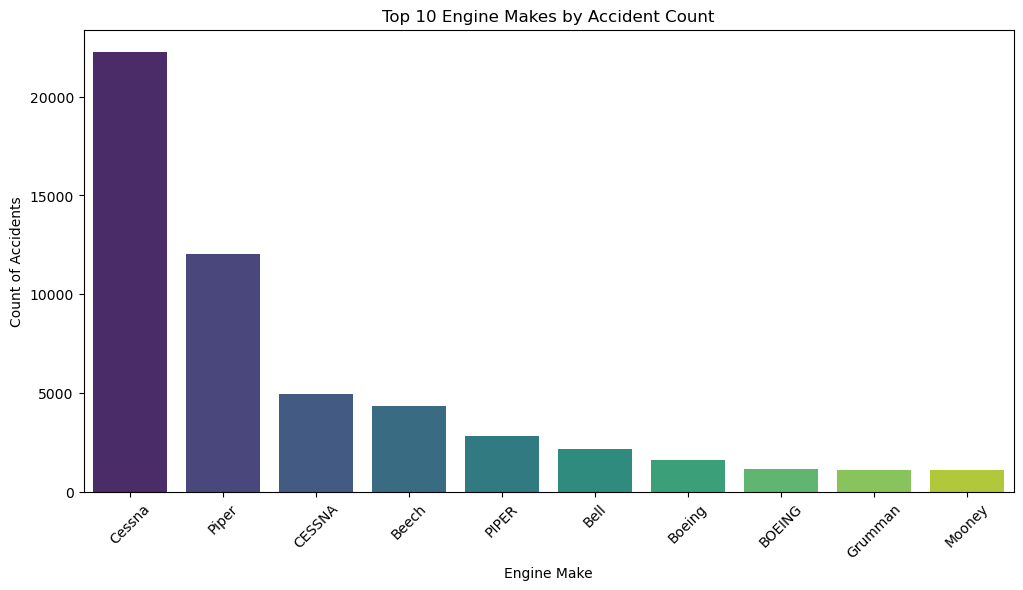

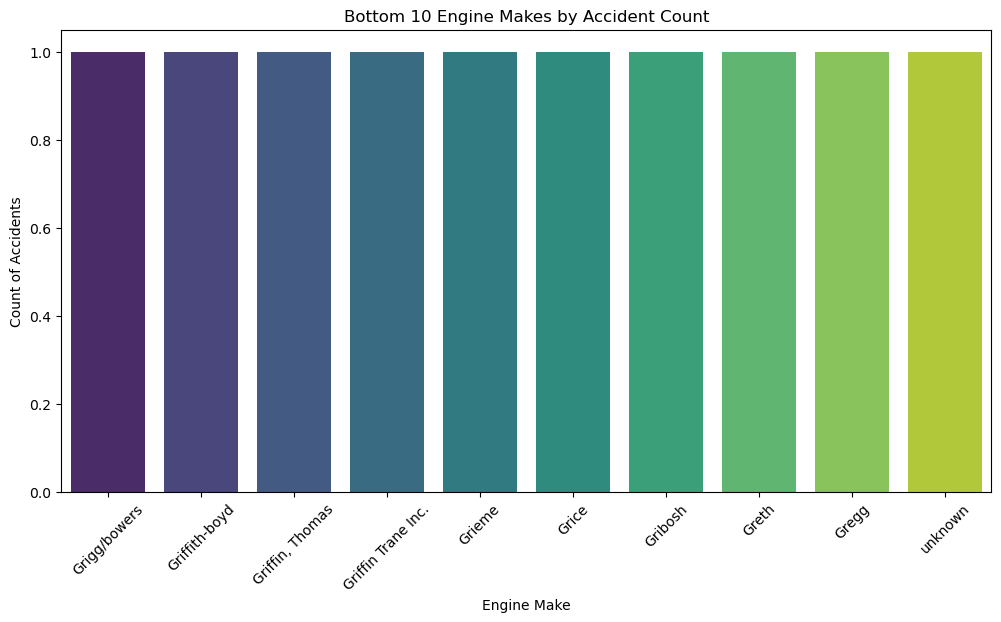

In [46]:
# Group by make and count the number of accidents for each make
accidents_by_make = df.groupby('Make')['Accident.Number'].count().reset_index()
accidents_by_make.rename(columns={'Accident.Number': 'Accident Count'}, inplace=True)

# Sort by accident count
accidents_by_make_sorted = accidents_by_make.sort_values('Accident Count', ascending=False)

# Plot for Top 10 Engine Makes
plt.figure(figsize=(12, 6))
sns.barplot(data=accidents_by_make_sorted.head(10), x='Make', y='Accident Count', palette='viridis')
plt.xlabel("Engine Make")
plt.ylabel("Count of Accidents")
plt.title("Top 10 Engine Makes by Accident Count")
plt.xticks(rotation=45)
plt.show()

# Plot for Bottom 10 Engine Makes
plt.figure(figsize=(12, 6))
sns.barplot(data=accidents_by_make_sorted.tail(10), x='Make', y='Accident Count', palette='viridis')
plt.xlabel("Engine Make")
plt.ylabel("Count of Accidents")
plt.title("Bottom 10 Engine Makes by Accident Count")
plt.xticks(rotation=45)
plt.show()


#### Cessna engines seem to be a safety risk having over 20,000 cases of accidents. It would be advisable to look into safer alternatives such as the Grice, Gregg and the Greth makes.

## Accidents by Engine Model

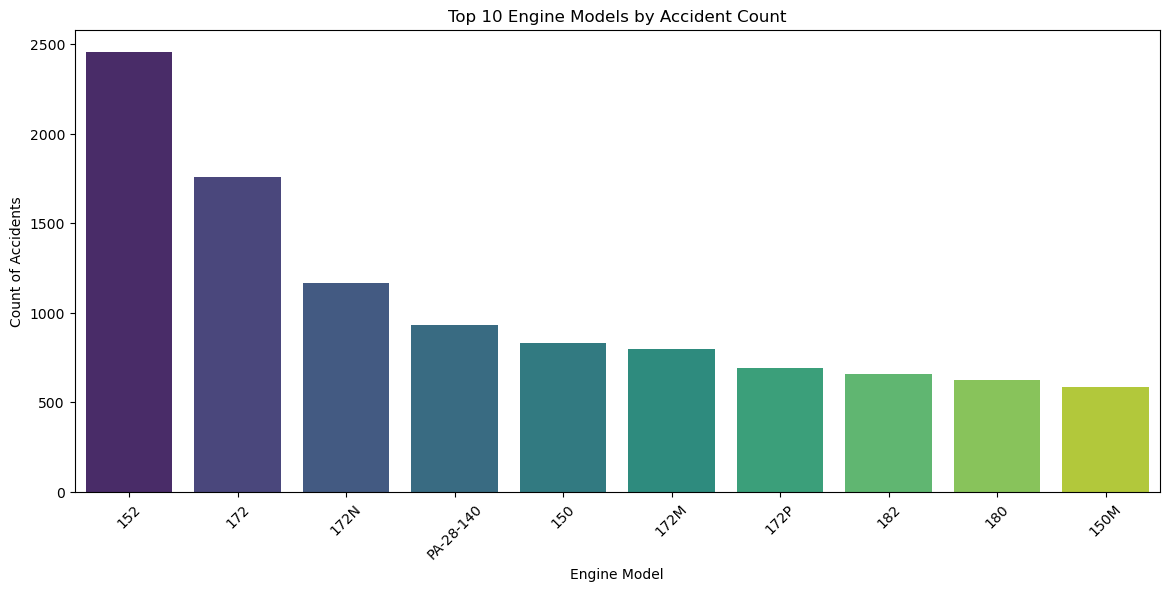

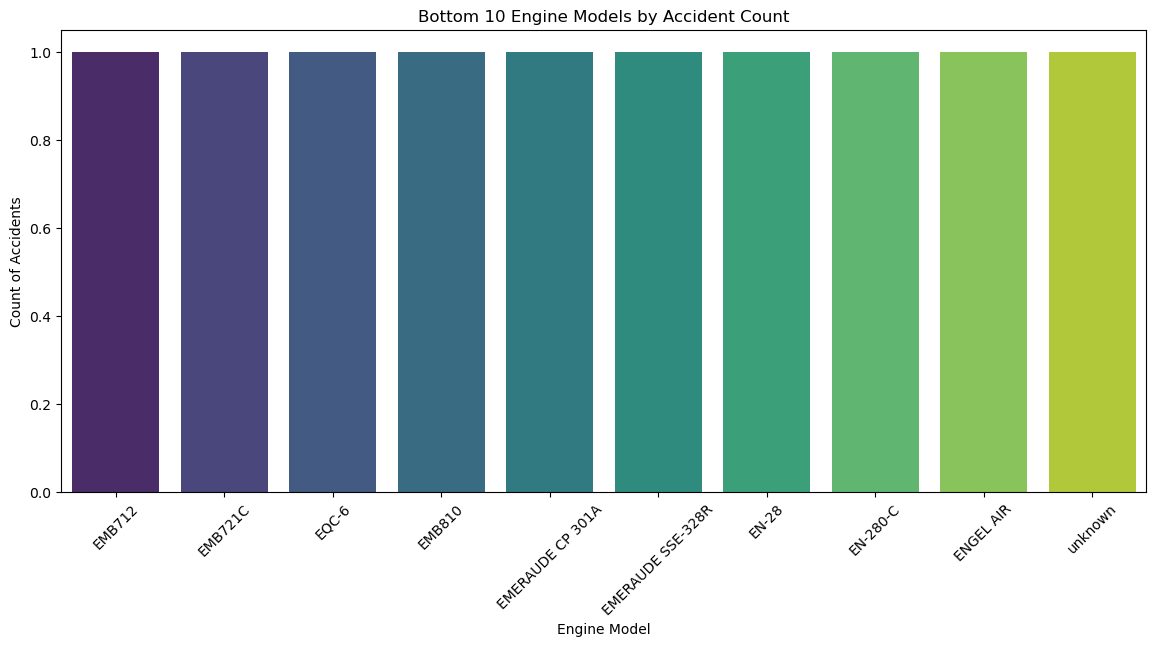

In [51]:
# Group by model and count the number of accidents for each model
accidents_by_model = df.groupby('Model')['Accident.Number'].count().reset_index()
accidents_by_model.rename(columns={'Accident.Number': 'Accident Count'}, inplace=True)

# Sort by accident count
accidents_by_model_sorted = accidents_by_model.sort_values('Accident Count', ascending=False)

# Plot for Top 10 Engine Models
plt.figure(figsize=(14, 6))
sns.barplot(data=accidents_by_model_sorted.head(10), x='Model', y='Accident Count', palette='viridis')
plt.xlabel("Engine Model")
plt.ylabel("Count of Accidents")
plt.title("Top 10 Engine Models by Accident Count")
plt.xticks(rotation=45)
plt.show()

# Plot for Bottom 10 Engine Models
plt.figure(figsize=(14, 6))
sns.barplot(data=accidents_by_model_sorted.tail(10), x='Model', y='Accident Count', palette='viridis')
plt.xlabel("Engine Model")
plt.ylabel("Count of Accidents")
plt.title("Bottom 10 Engine Models by Accident Count")
plt.xticks(rotation=45)
plt.show()


#### The 152 and 172 series of engine models account for most of the accidents in the top 10. It would be advisable to avoid these models and instead go for models that have proven to be safer such as the Engel Air and EN-280C

## Accidents by Weather Conditions

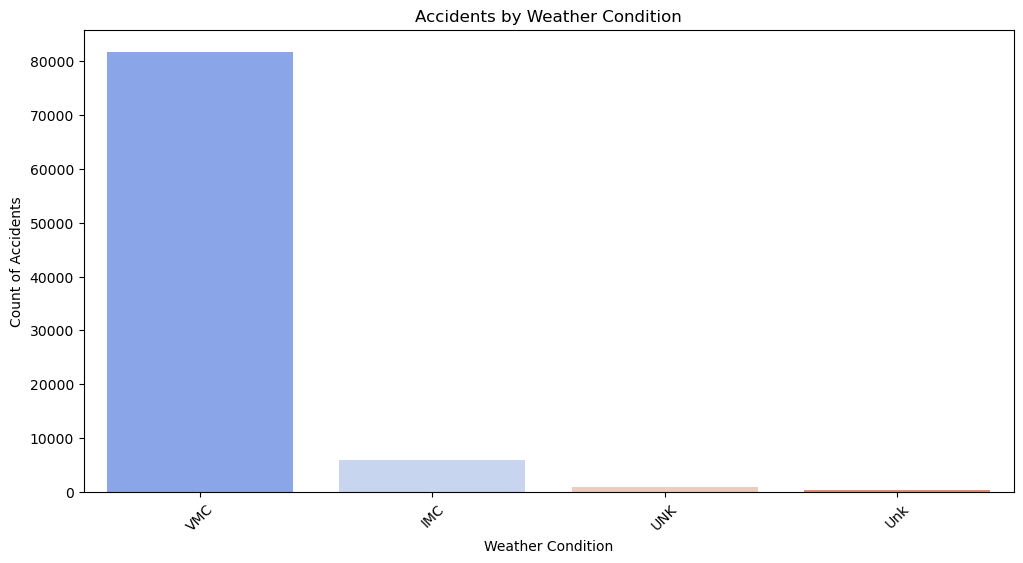

In [54]:
# Group by weather conditions and count the number of accidents for each condition
accidents_by_weather = df.groupby('Weather.Condition')['Accident.Number'].count().reset_index()
accidents_by_weather.rename(columns={'Accident.Number': 'Accident Count'}, inplace=True)

# Sort by accident count in descending order
accidents_by_weather_sorted = accidents_by_weather.sort_values('Accident Count', ascending=False)

# bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=accidents_by_weather_sorted, x='Weather.Condition', y='Accident Count', palette='coolwarm')
plt.xlabel("Weather Condition")
plt.ylabel("Count of Accidents")
plt.title("Accidents by Weather Condition")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()


#### Most accidents happened when the weather condition was defined as VMC. This is an indicator that flights should not opertate under certain weather conditions.

## Purpose of flight vs Number of Accidents.

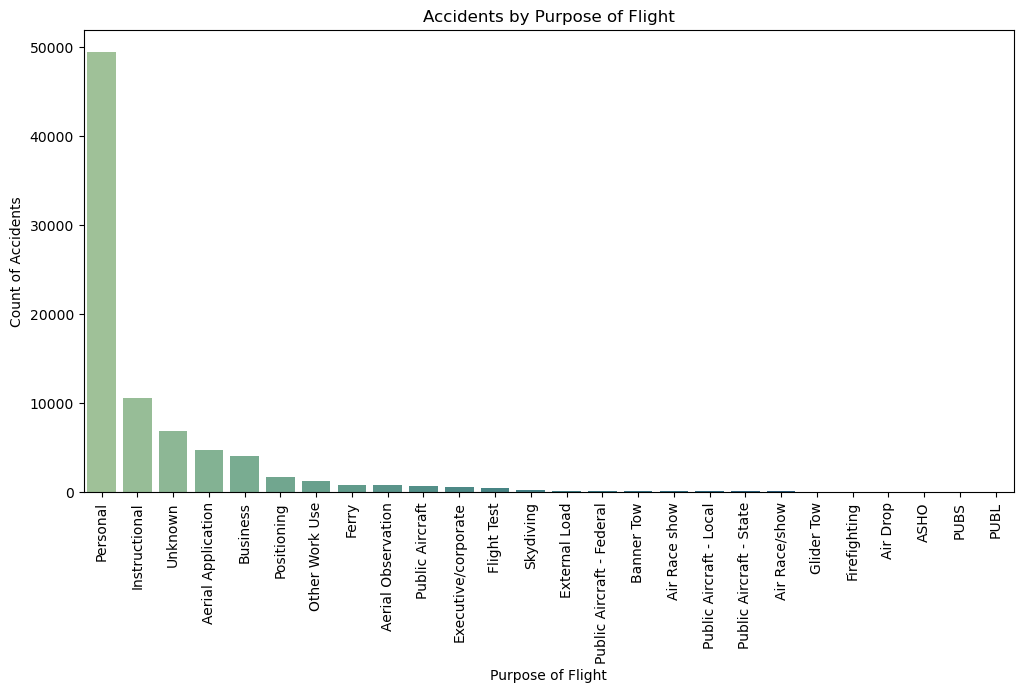

In [61]:
# Number of Accidents based on Purpose of Flight
# Group by 'Purpose.of.Flight' and count the number of accidents for each purpose
accidents_by_purpose = df.groupby('Purpose.of.flight')['Accident.Number'].count().reset_index()
accidents_by_purpose.rename(columns={'Accident.Number': 'Accident Count'}, inplace=True)

# Sort by accident count in descending order for better visualization
accidents_by_purpose_sorted = accidents_by_purpose.sort_values('Accident Count', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=accidents_by_purpose_sorted, x='Purpose.of.flight', y='Accident Count', palette='crest')
plt.xlabel("Purpose of Flight")
plt.ylabel("Count of Accidents")
plt.title("Accidents by Purpose of Flight")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()


#### Personal flights lead in the number of accidents with almost 4 times the number of accidents as the next cause. The investors could focus on the less risky areas e.g. public transport aircraft.

## Engine type vs Number of Accidents

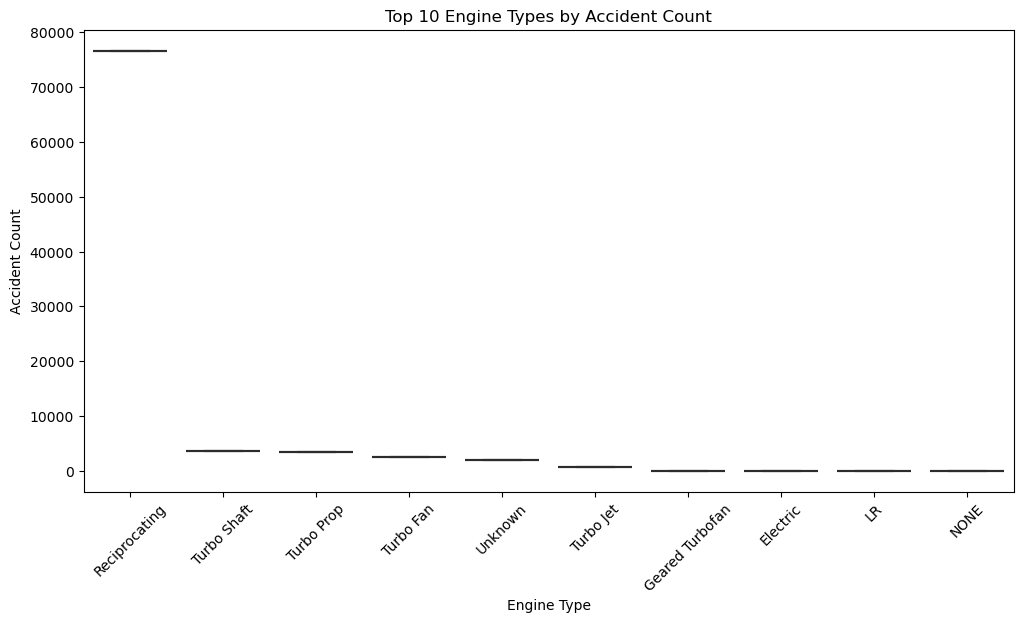

In [65]:
# box plot for the top 10 engine types
accidents_by_engine_type = df.groupby('Engine.Type')['Accident.Number'].count().reset_index()

# Rename the 'Accident.Number' column to 'Accident Count' for clarity
accidents_by_engine_type.rename(columns={'Accident.Number': 'Accident Count'}, inplace=True)

# Sort the data by accident count in descending order
accidents_by_engine_type_sorted = accidents_by_engine_type.sort_values('Accident Count', ascending=False)
top_10_engine_types = accidents_by_engine_type_sorted.head(10)

#plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=top_10_engine_types, x='Engine.Type', y='Accident Count', palette='viridis')
plt.xlabel("Engine Type")
plt.ylabel("Accident Count")
plt.title("Top 10 Engine Types by Accident Count")
plt.xticks(rotation=45)
plt.show()


#### Reciprocating engines had the highest number of accidents. The investor should look into other safer alternatives with a lower failure rate.

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


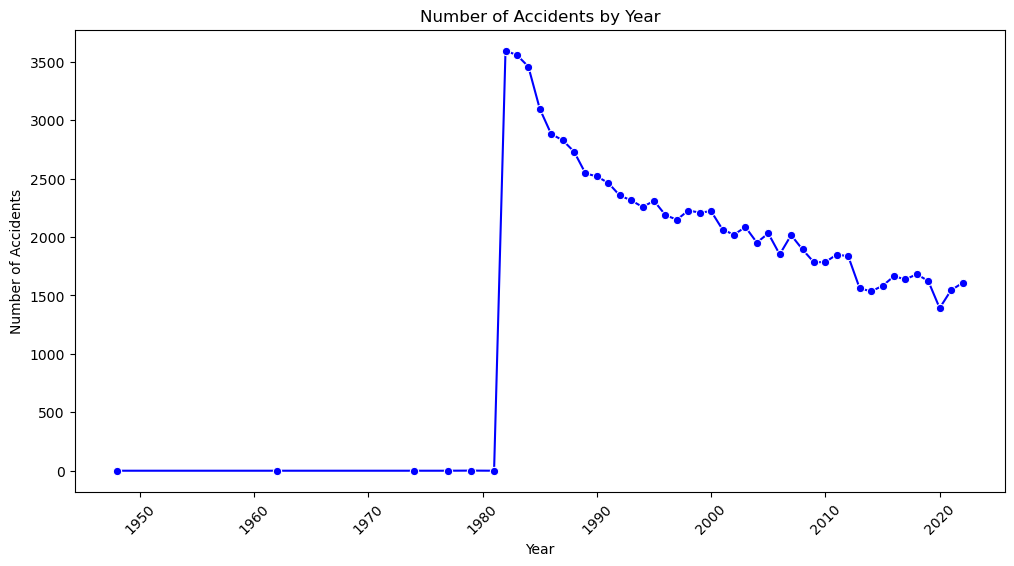

In [67]:
# Convert to year
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce').dt.year  

# Group by Year and count the number of accidents for each year
accidents_by_year = df.groupby('Event.Date')['Accident.Number'].count().reset_index()

# Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=accidents_by_year, x='Event.Date', y='Accident.Number', marker="o", color='b')
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents by Year")
plt.xticks(rotation=45)
plt.show()


#### The line plot shows the recent developments in improving safety measures in the aviation industry seem to be working as shown by the receding number of accidents almost every year. The aviation industry is hence safe to invest in with trends indicating safer flights in the near future.